<a href="https://colab.research.google.com/github/mahesh-keswani/pytorch-example-notebook/blob/main/6_PyTorchCustomModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000
X = np.random.random( (N, 2) ) * 10 - 5
Y = np.sin(2 * X[:, 0]) + np.cos(3 * X[:, 1]) + np.random.randn(N) * 0.5
# y = sin(2x1) + cos(3x2) + gaussian_noise_with_variance_0.5

In [3]:
inputs = torch.from_numpy( X.astype(np.float32) )
targets = torch.from_numpy( Y.astype(np.float32).reshape(N, -1) )

In [4]:
# Lets start with Sequential Module first
sequential = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam( sequential.parameters(), lr = 0.001 )

EPOCHS = 1000
losses = np.zeros(EPOCHS)
for epoch in range(EPOCHS):
    optimizer.zero_grad()
    outputs = sequential( inputs )
    loss = criterion( outputs, targets )
    losses[epoch] = loss.item()

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch = {epoch + 1}/{EPOCHS}, Loss = {loss.item()}")

Epoch = 100/1000, Loss = 1.175911784172058
Epoch = 200/1000, Loss = 1.158880352973938
Epoch = 300/1000, Loss = 1.1416081190109253
Epoch = 400/1000, Loss = 1.1192865371704102
Epoch = 500/1000, Loss = 1.0914572477340698
Epoch = 600/1000, Loss = 1.0563119649887085
Epoch = 700/1000, Loss = 1.0163984298706055
Epoch = 800/1000, Loss = 0.9727374315261841
Epoch = 900/1000, Loss = 0.9316060543060303
Epoch = 1000/1000, Loss = 0.8948610424995422


In [5]:
# nn.Module is the base class that all other modules inherit from
# e.g nn.Linear inherits from nn.Module (it is a module)
# nn.ReLU inherits from nn.Module (it is a module)
# Also, nn.Sequential inherits from nn.Module (it is a module of modules)
# (we can also have module of modules of modules)
# even though the Sequential acts a wrapper of list of Modules, it is itself a Module.
# This implies that our custom models will also inherit from Module class.
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # Note the architecture is same as the above model
        self.layer1 = nn.Linear(2, 128)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(128, 1)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

criterion = nn.MSELoss()
customANN = ANN()
optimizer = torch.optim.Adam( customANN.parameters(), lr = 0.001 )

EPOCHS = 1000
custom_losses = np.zeros(EPOCHS)
for epoch in range(EPOCHS):
    optimizer.zero_grad()
    outputs = customANN( inputs )
    loss = criterion( outputs, targets )
    custom_losses[epoch] = loss.item()

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch = {epoch + 1}/{EPOCHS}, Loss = {loss.item()}")

Epoch = 100/1000, Loss = 1.178771734237671
Epoch = 200/1000, Loss = 1.1579054594039917
Epoch = 300/1000, Loss = 1.1402301788330078
Epoch = 400/1000, Loss = 1.1195522546768188
Epoch = 500/1000, Loss = 1.0915724039077759
Epoch = 600/1000, Loss = 1.0565627813339233
Epoch = 700/1000, Loss = 1.0160218477249146
Epoch = 800/1000, Loss = 0.9732643961906433
Epoch = 900/1000, Loss = 0.9323504567146301
Epoch = 1000/1000, Loss = 0.8955215811729431


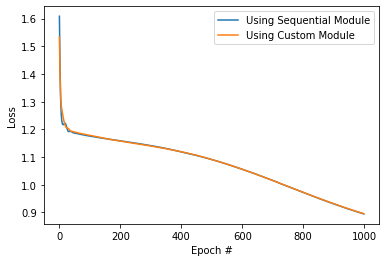

In [6]:
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.plot(losses, label = "Using Sequential Module")
plt.plot(custom_losses, label = "Using Custom Module")
plt.legend();

In [7]:
# Should have done some seeding first, but okay :D